<div style="text-align: right"> Practical lesson 1 <br/> Sébastien Harispe </div>

<h1><center>Practical Machine Learning: <br/> Linear Regression &amp; Normal Equation <br/>
    Correction
    </center></h1>

<br/>

# Aim of the practical lesson

In this practical lesson we will implement the normal equation to find the optimal parameters of a linear regression model wrt to Mean Squared Error. 

### Closed form solution for linear regression using numpy

Below an example showing how to manually compute closed form solutions for linear regression problems using least square solution.

<div class="alert alert-warning">
  <b>NOTE</b> Below we recall the closed form solution for linear regression problems using least square solution. Before reading it, note that it would do you good to take a sheet of paper to write all you know about it, even to try deriving the closed form solution by yourself.
</div>

Recall that for linear regression we consider: 
\begin{equation}
y=X\theta
\end{equation}
with $X \in  \mathbb{R}^{n \times m}$ the design matrix, i.e. matrix in which raws are inputs and the first column is filled with ones. $\theta$ is the vector storing the parameters we are looking for. For each pair $(x^{(i)},y^{(i)})$ we assume $y^{(i)} = \sum_{j=0}^n \theta_j x_j^{(i)}$.

The least square solution is given by:
\begin{equation}
\hat{\theta} = argmin_{\theta} || X\theta - y ||_2
\end{equation}
with closed form solution:
\begin{equation}
\hat{\theta} = (X^T X)^{-1} X^T y
\end{equation}

Consider the following data

In [11]:
import numpy as np

X = np.array([[1.0, 2.0], [10.0, 8.0], [12.0, 6.0],[5.0, 4.0]])
y = np.array([0.75,9.75,9.25,4.25])

<IPython.core.display.Javascript object>


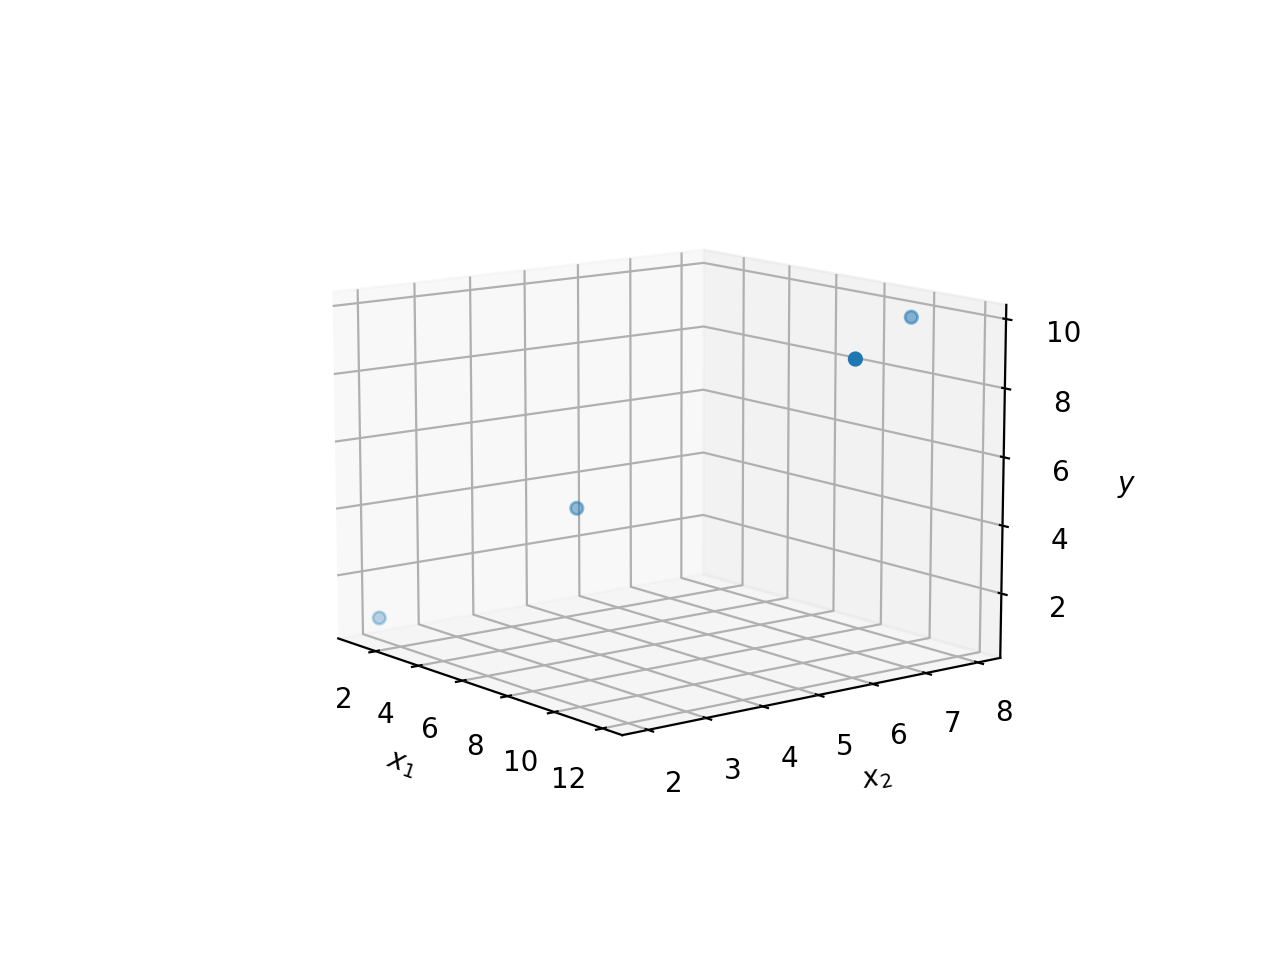

In [12]:
# Visualization of the points
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# enable interactive mode
%matplotlib notebook 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$');

<div class="alert alert-success">
  <b>EXERCISE</b> Compute the closed form solution specified above considering the data specified above: X data points are provided in matrix form (entries represented as rows), expected outputs are provided in a column vector form. Compute the solution given for the data point (8,15). <br/>
</div>

In [13]:
X = np.array([
    [1.0, 2.0], 
    [10.0, 8.0], 
    [12.0, 6.0],
    [5.0, 4.0], 
    [1.0, 2.0]
])
y = np.array([0.75,9.75,9.25,4.25, 1.75])

X_nbraws = np.size(X,0)
Xd = np.c_[ np.ones(X_nbraws), X ] # We add a column of one to enable the intercept theta_0 (i.e design matrix) 

theta = np.linalg.inv(Xd.T @ Xd) @ Xd.T @ y
print(f"theta: {theta}")
print(f"pred: {Xd @ theta}")
print(f"y  : {y}")

# prediction for any new vector
x = np.array([1.0, 8.0, 15.0])
print("prediction: {}".format(x @ theta)) 

theta: [-0.72619048  0.46825397  0.71825397]
pred: [1.17857143 9.70238095 9.20238095 4.48809524 1.17857143]
y  : [0.75 9.75 9.25 4.25 1.75]
prediction: 13.793650793650777


<IPython.core.display.Javascript object>


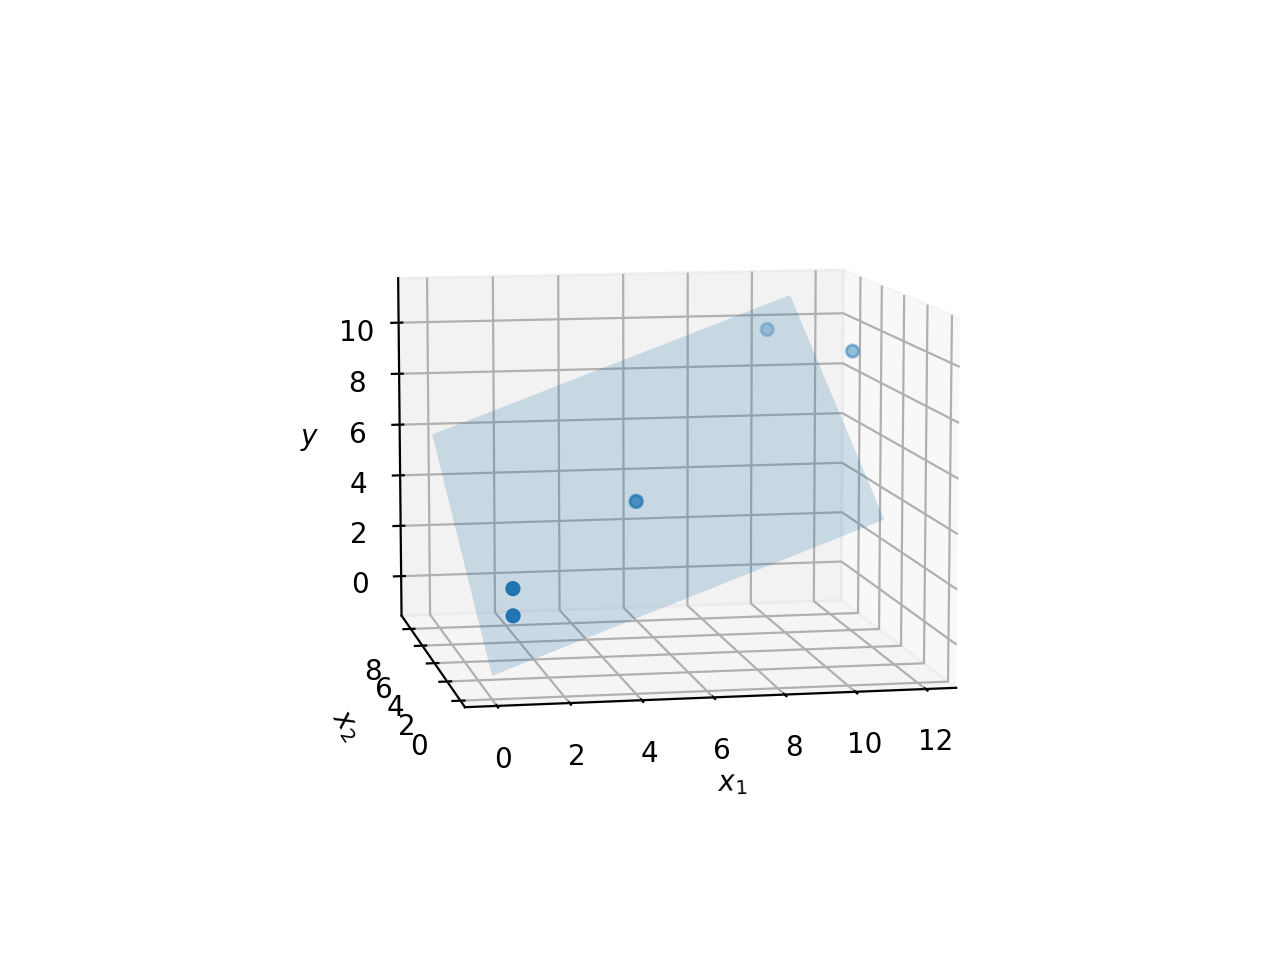

In [14]:
# Visualization
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# once theta is computed

%matplotlib notebook

# create x,y
xx, yy = np.meshgrid(range(12), range(10))
#print(xx,yy)

# calculate corresponding z
z =  theta[0] + theta[1] * xx + theta[2] * yy
#print(z)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(xx, yy, z, alpha=0.2)
ax.scatter(X[:,0], X[:,1], y)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$');

<div class="alert alert-warning">
  <b>NOTE: </b> As additional exercice, generate a fictive dataset suited for regression by adding normal noise to a linear equation.
    Apply the linear model obtained using the closed form solution and plot it.
</div>

In [5]:
# cf. TP 1 apply the closed form to your dataset

theta : 
 [ 33.33341046 -77.91111096  19.38081825]


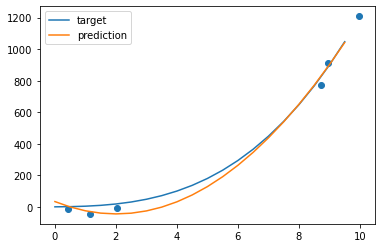

In [15]:
import numpy as np; 
import matplotlib.pyplot as plt

def f(x):
  return 2*x**2 + x + x**3

def create_X_matrix(x_samples):
  return np.c_[np.ones(x_samples.shape[0]), x_samples, x_samples**2]
  

nb_samples = 6
max_val = 10
x = np.random.rand(nb_samples) * max_val
x.sort() # required for the plot

y = f(x) 
y_noise = y + np.random.randn(nb_samples) * 50

X = create_X_matrix(x)
theta = np.linalg.inv((X.T@X))@(X.T@y_noise)
print ("theta : \n", theta)


# plotting
x_ = np.arange(start=0, stop=max_val, step=0.5)
y_ = f(x_)

X_ = create_X_matrix(x_)
y_pred_ = X_ @ theta

%matplotlib inline
plt.scatter(x, y_noise)
plt.plot(x_, y_, label="target")
plt.plot(x_, y_pred_, label="prediction")
plt.legend()